In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pingouin as pg

In [3]:
data = pd.read_csv('data/telecom_churn.csv')

In [4]:
data.head(2)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7


## Continous variables normality

### PCA

In [30]:
from sklearn.decomposition import PCA

contionous = data.loc[:,['AccountWeeks','DataUsage',	'CustServCalls',	'DayMins',	'DayCalls',	'MonthlyCharge',	'OverageFee',	'RoamMins' ]]

pca =PCA(n_components=5, random_state=42)

pca.fit(contionous)

PCA(n_components=5, random_state=42)

In [31]:
pca.explained_variance_ratio_ ,0.58 + 0.3 + 0.07 + 0.03 + 0.01

(array([0.58356687, 0.30260843, 0.07668552, 0.03424322, 0.00147146]), 0.99)

Five components of PCA explain 99% of the variance. The first component is the most important, explaining  almost 60% of the variance. The second component explains 15% of the variance. The third component explains 8% of the variance. The fourth component explains 5% of the variance. The fifth component explains 2% of the variance.

### Account Weeks

<AxesSubplot: title={'center': 'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

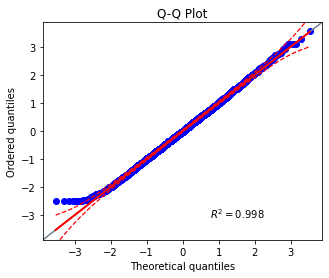

In [4]:
pg.qqplot(data['AccountWeeks'])

In [5]:
pg.normality(data['AccountWeeks'])

,W,pval,normal
AccountWeeks,0.998279,0.001158,False


### Data Usage

<AxesSubplot: title={'center': 'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

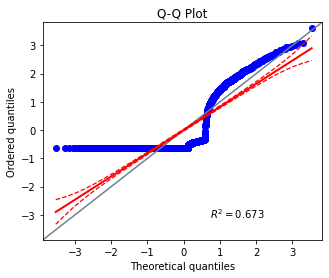

In [6]:
pg.qqplot(data['DataUsage'])

In [7]:
pg.normality(data['DataUsage'])

,W,pval,normal
DataUsage,0.672259,0.0,False


### Customer Service Calls

<AxesSubplot: title={'center': 'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

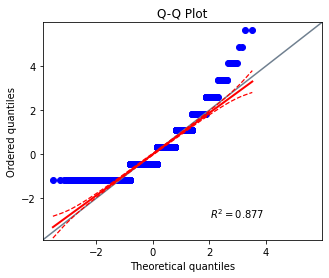

In [8]:
pg.qqplot(data['CustServCalls'])

In [9]:
pg.normality(data['CustServCalls'])

,W,pval,normal
CustServCalls,0.876711,1.401298e-45,False


### Daily Minutes

<AxesSubplot: title={'center': 'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

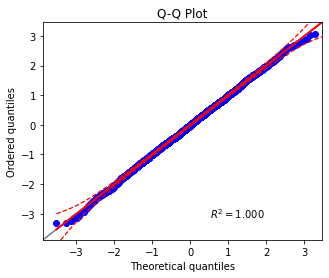

In [10]:
pg.qqplot(data['DayMins'])

In [11]:
pg.normality(data['DayMins'])

,W,pval,normal
DayMins,0.999536,0.636547,True


### Day Calls

<AxesSubplot: title={'center': 'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

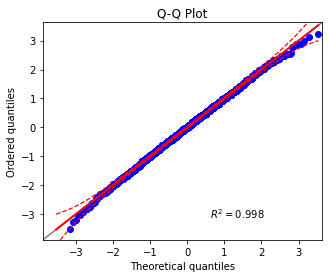

In [12]:
pg.qqplot(data['DayCalls'])

In [13]:
pg.normality(data['DayCalls'])

,W,pval,normal
DayCalls,0.997986,0.000277,False


### Monthly Charge

<AxesSubplot: title={'center': 'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

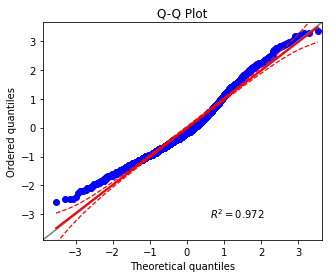

In [14]:
pg.qqplot(data['MonthlyCharge'])

In [15]:
pg.normality(data['MonthlyCharge'])

,W,pval,normal
MonthlyCharge,0.971327,2.550268e-25,False


### Overage Fee

<AxesSubplot: title={'center': 'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

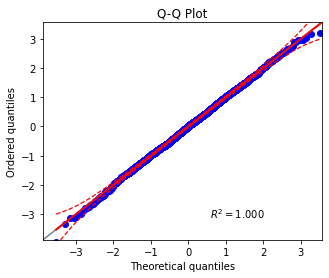

In [16]:
pg.qqplot(data['OverageFee'])

In [17]:
pg.normality(data['OverageFee'])

,W,pval,normal
OverageFee,0.999573,0.713855,True


### Roaming Minutes

<AxesSubplot: title={'center': 'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

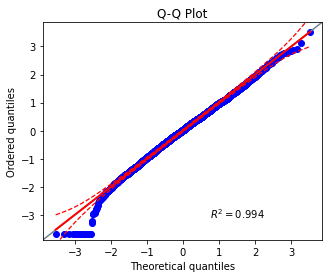

In [18]:
pg.qqplot(data['RoamMins'])

In [19]:
pg.normality(data['RoamMins'])

,W,pval,normal
RoamMins,0.993734,8.162566e-11,False


## Realtionship analysis

<AxesSubplot: >

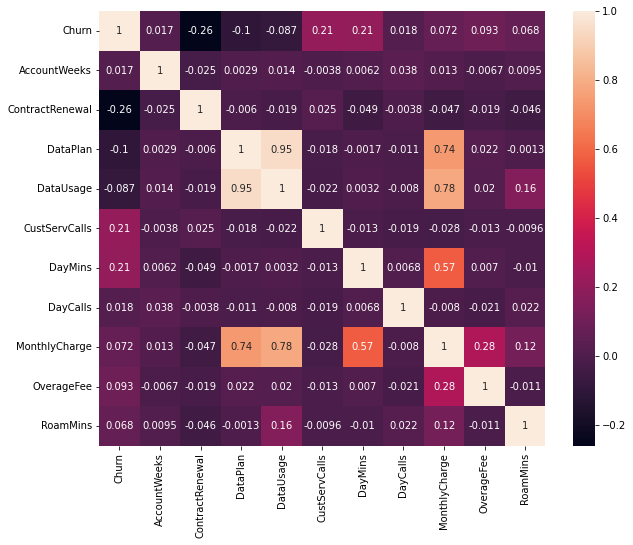

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)

In [21]:
churned = data[data['Churn'] == 1]
stayed = data[data['Churn'] == 0]

## Daymins and churn

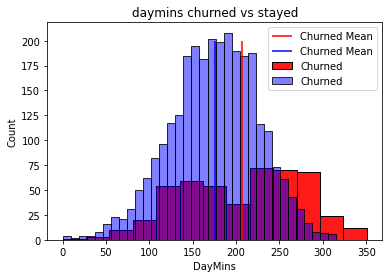

In [22]:
plt.title('daymins churned vs stayed')
sns.histplot(churned['DayMins'], label='Churned', color='red', alpha = 0.9)
plt.vlines(churned['DayMins'].mean(), 0, 200, color='red', label='Churned Mean')

sns.histplot(stayed['DayMins'], label='Churned', color='blue',alpha = 0.5)
plt.vlines(stayed['DayMins'].mean(), 0, 200, color='blue', label='Churned Mean')
plt.legend()

In [23]:
round(pg.ttest(churned['DayMins'], stayed['DayMins']),4) # t-test for difference in means

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,9.6846,571.5133,two-sided,0.0,"[25.3, 38.18]",0.5953,4.712e+18,1.0


On average the churned customers have a higher daymins than the non churned customers. Which is quite suprising realtionship that the most active customers are the ones that are more likely to churn.

### Daymins Monthly charged

In [24]:
pg.corr(data['DayMins'], data['MonthlyCharge'])

,n,r,CI95%,p-val,BF10,power
pearson,3333,0.567968,"[0.54, 0.59]",4.698628e-284,7.616e+279,1.0


e:\anaconda\envs\data_science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='DayMins', ylabel='MonthlyCharge'>

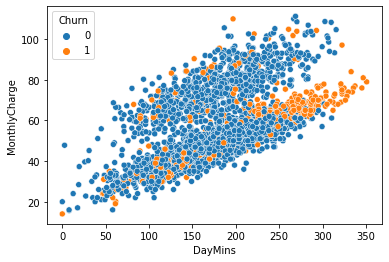

In [25]:
sns.scatterplot(data['DayMins'], data['MonthlyCharge'], hue = data['Churn'])

### MonthlyCharged Churned 

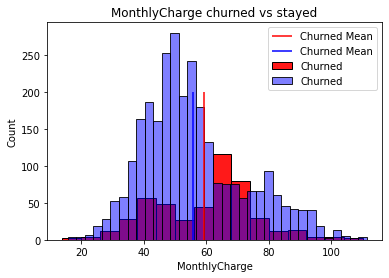

In [26]:
plt.title('MonthlyCharge churned vs stayed')
sns.histplot(churned['MonthlyCharge'], label='Churned', color='red', alpha = 0.9)
plt.vlines(churned['MonthlyCharge'].mean(), 0, 200, color='red', label='Churned Mean')

sns.histplot(stayed['MonthlyCharge'], label='Churned', color='blue',alpha = 0.5)
plt.vlines(stayed['MonthlyCharge'].mean(), 0, 200, color='blue', label='Churned Mean')
plt.legend()

In [27]:
churned['MonthlyCharge'].agg(['mean', 'median', 'std'])

mean      59.190062
median    63.000000
std       16.065479
Name: MonthlyCharge, dtype: float64

In [28]:
stayed['MonthlyCharge'].agg(['mean', 'median', 'std'])

mean      55.816246
median    53.000000
std       16.439011
Name: MonthlyCharge, dtype: float64

In [29]:
round(pg.ttest(churned['MonthlyCharge'], stayed['MonthlyCharge']),4) # t-test for difference in means

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.2533,664.6939,two-sided,0.0,"[1.82, 4.93]",0.2059,422.369,0.9869


Users that churned have statistically significant higher monthly charged than the non churned users.

### Custserv calls churn

In [31]:
data['CustServCalls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: CustServCalls, dtype: int64

In [42]:
three_calls = data[data['CustServCalls'] > 2] # 3,4,5, 6,7,8,9
four_calls = data[data['CustServCalls'] > 3] # 4,5, 6,7,8,9
five_calls = data[data['CustServCalls'] > 4] # 5, 6,7,8,9
six_calls = data[data['CustServCalls'] > 5] #  6,7,8,9
seven_calls = data[data['CustServCalls'] > 6] #  7,8,9
eight_calls = data[data['CustServCalls'] > 7] #  8,9

In [40]:
round(len(three_calls[three_calls['Churn'] == 1]) / len(three_calls),2), round(len(four_calls[four_calls['Churn'] == 1]) / len(four_calls),2)

(0.26, 0.52)

In [41]:
round(len(five_calls[five_calls['Churn'] == 1]) / len(five_calls),2), round(len(six_calls[six_calls['Churn'] == 1]) / len(six_calls),2)

(0.61, 0.63)

In [43]:
round(len(seven_calls[seven_calls['Churn'] == 1]) / len(seven_calls),2), round(len(eight_calls[eight_calls['Churn'] == 1]) / len(eight_calls),2)

(0.62, 0.75)

The higher is the number of customer service calls the more likely the user is to churn.